In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###  Reading the CSV file

In [2]:
df = pd.read_csv('train-chennai-sale.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [3]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

###  Droping the unwanted columns

In [4]:
df = df.drop(columns=['PRT_ID', 'REG_FEE', 'COMMIS'])

In [5]:
df['sold_year'] = df['DATE_SALE'].apply(lambda x :x[6:])

In [6]:
df['build_year'] = df['DATE_BUILD'].apply(lambda x:x[6:])

In [7]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,sold_year,build_year
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,2011,1967
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,2006,1995
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,2012,1992
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,2010,1988
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,2009,1979


In [8]:
df = df.drop(columns=['DATE_SALE','DATE_BUILD'])

In [9]:
df.shape

(7109, 19)

###  Calculating the Age of the house

In [10]:
house_age = []
for i in range(df.shape[0]):
    x = int(df['sold_year'][i]) - int(df['build_year'][i])
    house_age.append(x)

df['house_age'] = house_age

In [11]:
df.shape

(7109, 20)

In [12]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,sold_year,build_year,house_age
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,2011,1967,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,2006,1995,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,2012,1992,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,2010,1988,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,2009,1979,30


###  Data Cleaning and Univariant Analysis

In [13]:
df['AREA'].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [14]:
df['AREA'] = df['AREA'].replace({"Chrompt":"Chrompet","Chrmpet":"Chrompet","Chormpet":"Chrompet",
                                 "TNagar":"T Nagar","Karapakam":"Karapakkam","Ana Nagar":"Anna Nagar",
                                 "Velchery":"Velachery","Ann Nagar":"Anna Nagar","Adyr":"Adyar",
                                 "KKNagar":"KK Nagar"})

In [15]:
df['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

<AxesSubplot: xlabel='AREA', ylabel='count'>

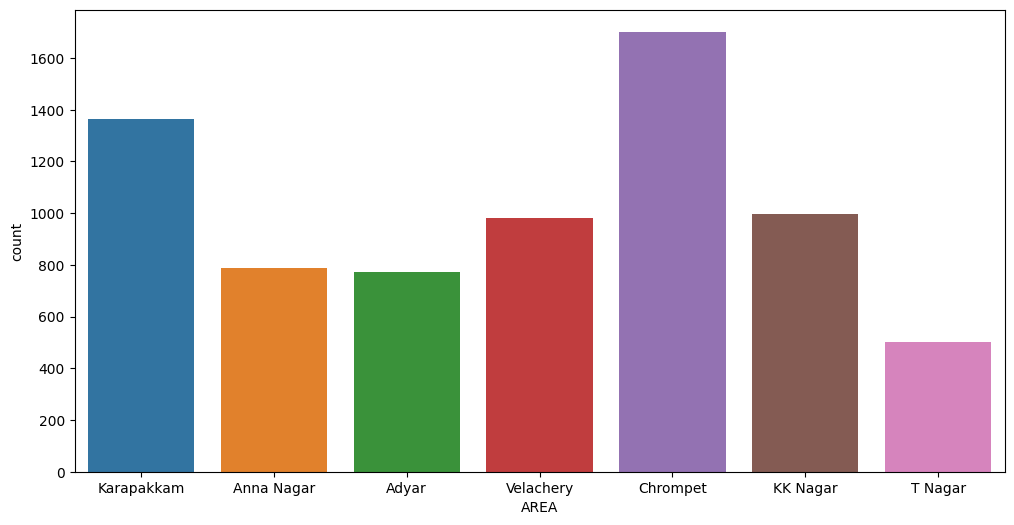

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(x="AREA",data=df)

###  Missing values or Null value analysis

In [17]:
df.isnull().sum()

AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
sold_year         0
build_year        0
house_age         0
dtype: int64

<AxesSubplot: >

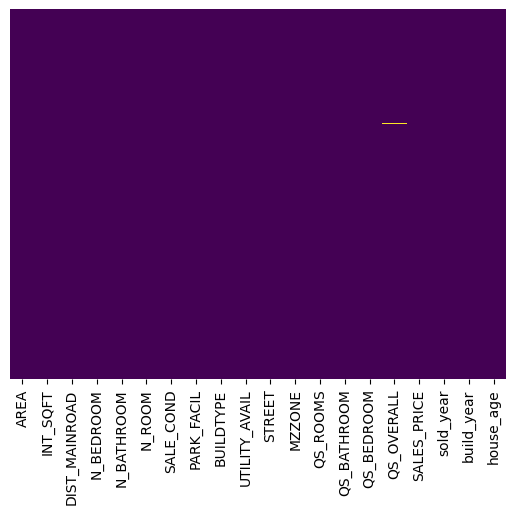

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
df = df.dropna()

In [20]:
df['SALE_COND'].value_counts()

AdjLand        1426
Normal Sale    1416
Partial        1414
AbNormal       1396
Family         1390
Adj Land          6
Ab Normal         5
Partiall          2
PartiaLl          1
Name: SALE_COND, dtype: int64

In [21]:
df['SALE_COND'] = df['SALE_COND'].replace({"Adj Land":"AdjLand","Ab Normal":"AbNormal",
                                           "Partiall":"Partial","PartiaLl":"Partial"})

In [22]:
df['SALE_COND'].value_counts()

AdjLand        1432
Partial        1417
Normal Sale    1416
AbNormal       1401
Family         1390
Name: SALE_COND, dtype: int64

<AxesSubplot: xlabel='SALE_COND', ylabel='count'>

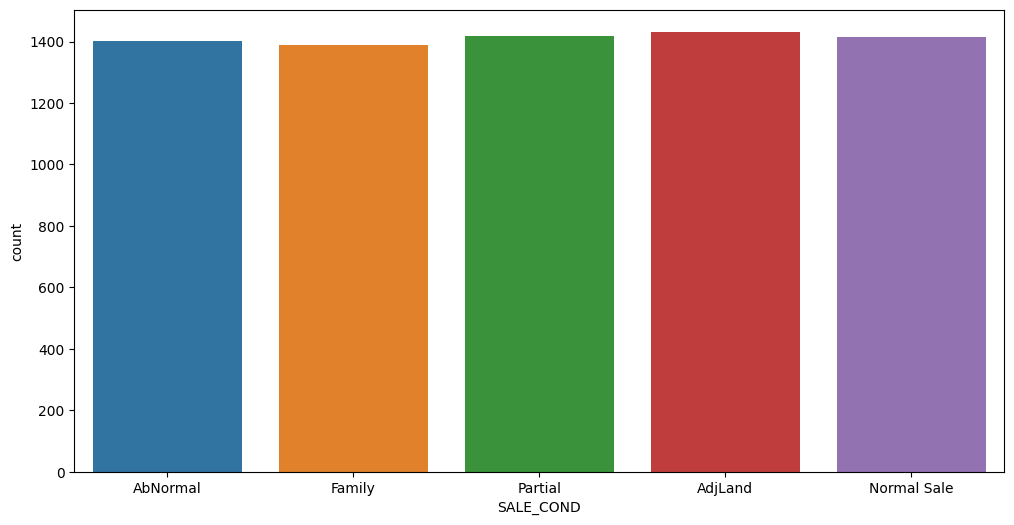

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(x="SALE_COND",data=df)

In [24]:
df['PARK_FACIL'].value_counts()

Yes    3557
No     3498
Noo       1
Name: PARK_FACIL, dtype: int64

In [25]:
df['PARK_FACIL'] = df['PARK_FACIL'].replace({"Noo":"No"})

In [26]:
df['PARK_FACIL'].value_counts()

Yes    3557
No     3499
Name: PARK_FACIL, dtype: int64

<AxesSubplot: xlabel='PARK_FACIL', ylabel='count'>

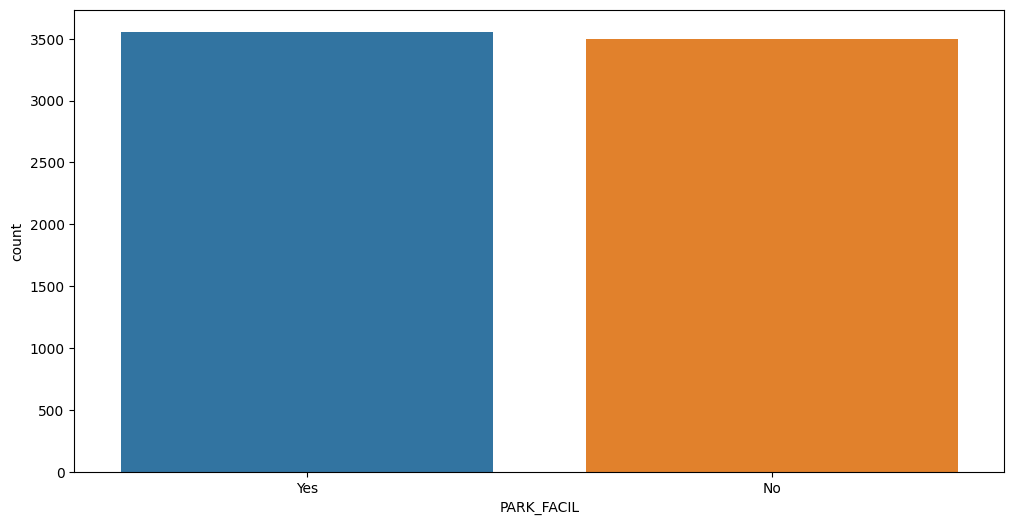

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x='PARK_FACIL',data=df)

In [28]:
df['BUILDTYPE'].value_counts()

House         2433
Commercial    2307
Others        2287
Other           25
Comercial        4
Name: BUILDTYPE, dtype: int64

In [29]:
df['BUILDTYPE'] = df['BUILDTYPE'].replace({"Comercial":"Commercial","Other":"Others"})

In [30]:
df['BUILDTYPE'].value_counts()

House         2433
Others        2312
Commercial    2311
Name: BUILDTYPE, dtype: int64

<AxesSubplot: xlabel='BUILDTYPE', ylabel='count'>

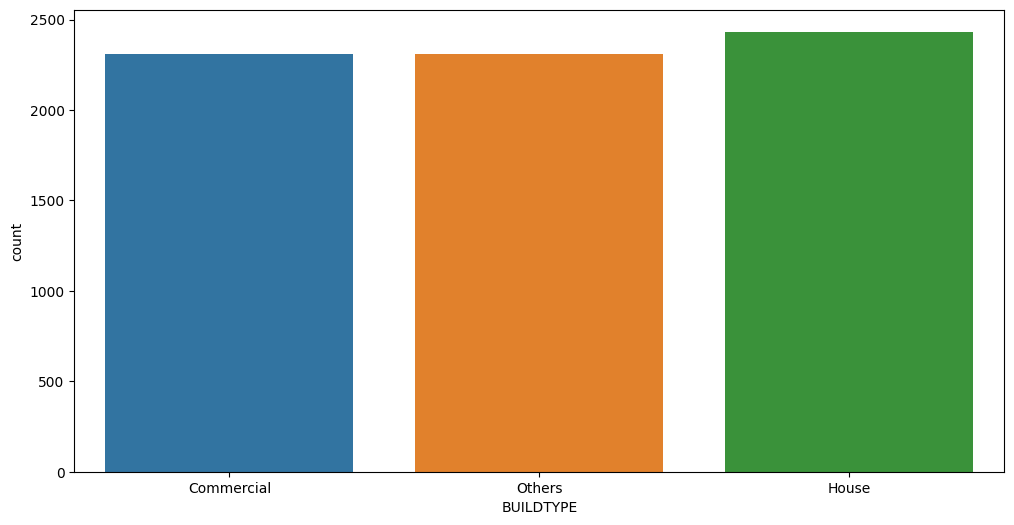

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(x='BUILDTYPE',data=df)

In [32]:
df['UTILITY_AVAIL'].value_counts()

AllPub     1874
NoSeWa     1860
NoSewr     1812
ELO        1509
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [33]:
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace({"All Pub":"AllPub"})

In [34]:
df['UTILITY_AVAIL'].value_counts()

AllPub     1875
NoSeWa     1860
NoSewr     1812
ELO        1509
Name: UTILITY_AVAIL, dtype: int64

<AxesSubplot: xlabel='UTILITY_AVAIL', ylabel='count'>

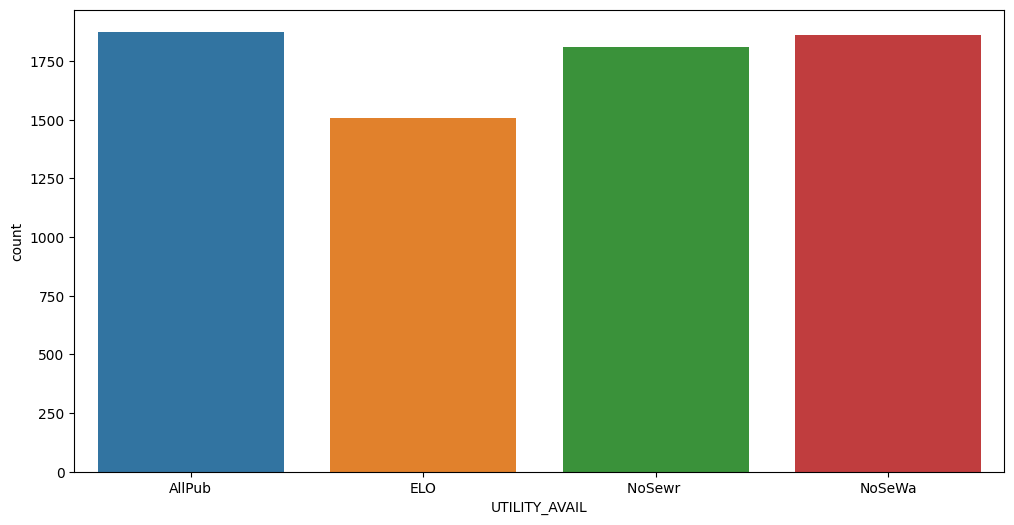

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(x='UTILITY_AVAIL',data=df)

In [36]:
df['STREET'].value_counts()

Paved        2542
Gravel       2502
No Access    1993
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [37]:
df['STREET'] = df['STREET'].replace({"Pavd":"Paved","NoAccess":"No Access"})

In [38]:
df['STREET'].value_counts()

Paved        2554
Gravel       2502
No Access    2000
Name: STREET, dtype: int64

<AxesSubplot: xlabel='STREET', ylabel='count'>

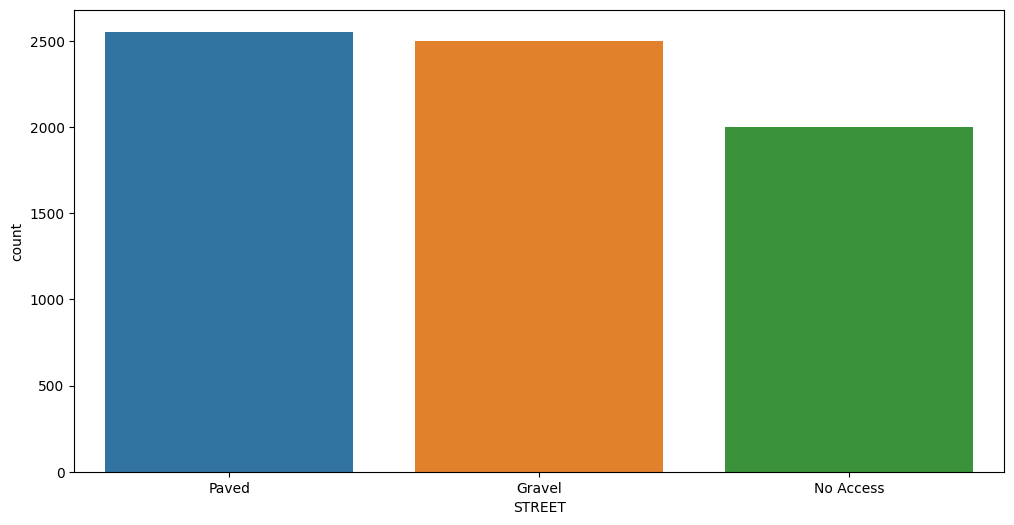

In [39]:
plt.figure(figsize=(12,6))
sns.countplot(x='STREET',data=df)

In [40]:
df['MZZONE'].value_counts()

RL    1849
RH    1808
RM    1801
C      547
A      533
I      518
Name: MZZONE, dtype: int64

<AxesSubplot: xlabel='MZZONE', ylabel='count'>

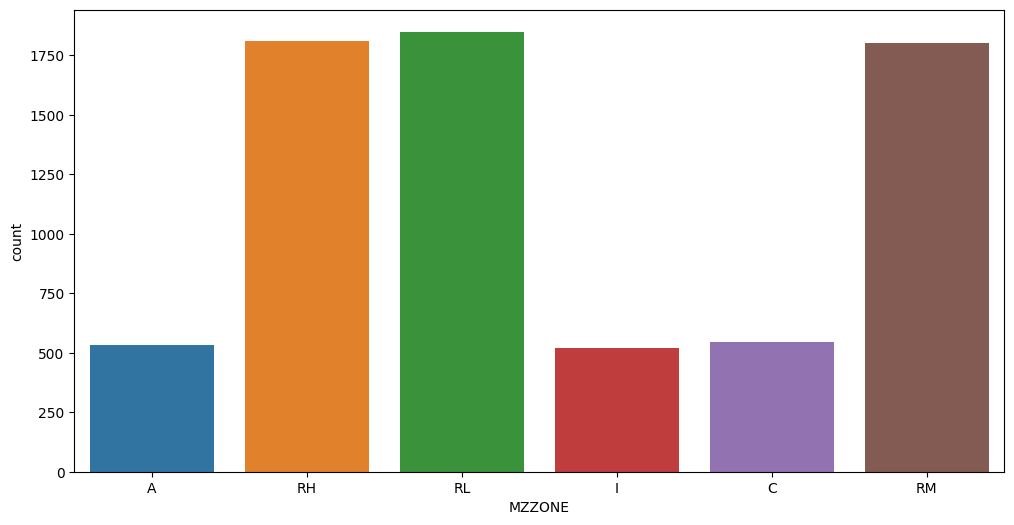

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(x='MZZONE',data=df)

### Checking for outliers in the countinuous features

In [42]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'sold_year', 'build_year', 'house_age'],
      dtype='object')

In [43]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,house_age
count,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7.056000e+03,7056.000000
mean,1381.316752,99.569161,1.636621,1.213152,3.686650,3.517177,3.505896,3.485332,3.503389,1.088801e+07,24.273526
std,457.860850,57.403870,0.803633,0.409563,1.020011,0.892141,0.897644,0.886814,0.527313,3.769081e+06,12.331565
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06,3.000000
25%,991.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.266790e+06,14.000000
50%,1369.500000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,1.031922e+07,23.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,1.298148e+07,34.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07,55.000000


<AxesSubplot: xlabel='INT_SQFT'>

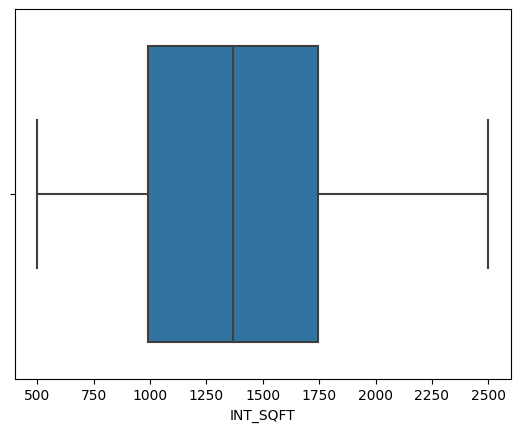

In [44]:
sns.boxplot(x='INT_SQFT',data=df)

<AxesSubplot: xlabel='DIST_MAINROAD'>

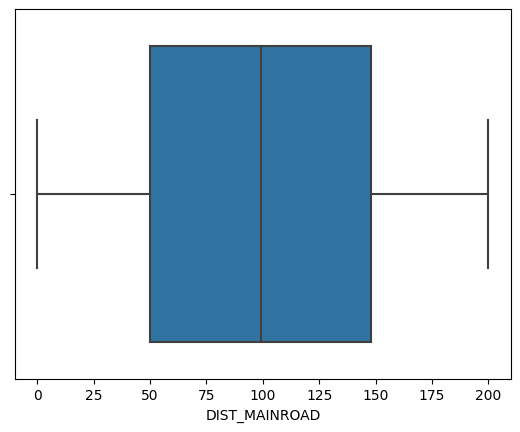

In [45]:
sns.boxplot(x='DIST_MAINROAD',data=df)

<AxesSubplot: xlabel='N_BEDROOM'>

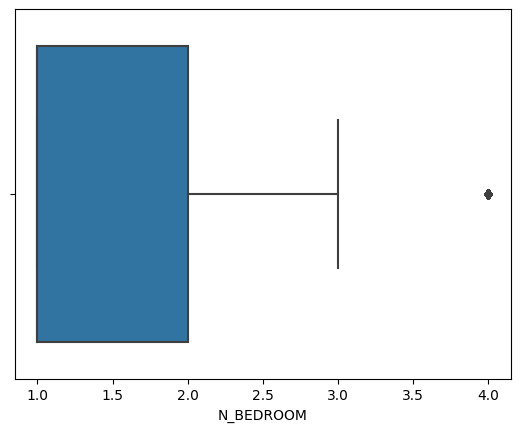

In [46]:
sns.boxplot(x='N_BEDROOM',data=df)

<AxesSubplot: xlabel='N_BATHROOM'>

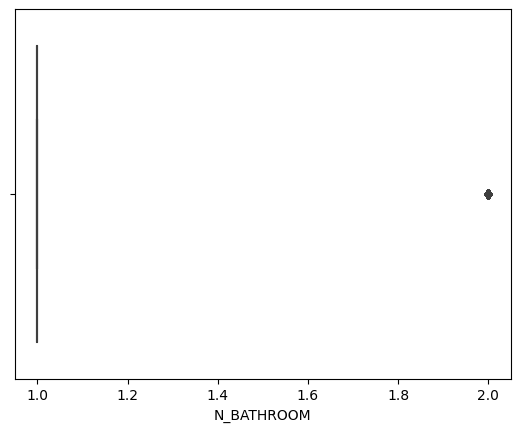

In [47]:
sns.boxplot(x='N_BATHROOM',data=df)

<AxesSubplot: xlabel='N_ROOM'>

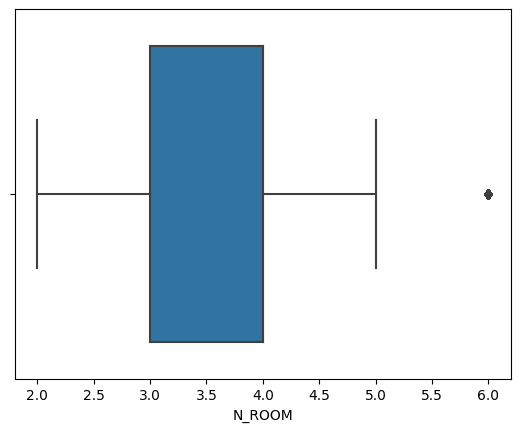

In [48]:
sns.boxplot(x='N_ROOM',data=df)

<AxesSubplot: xlabel='house_age'>

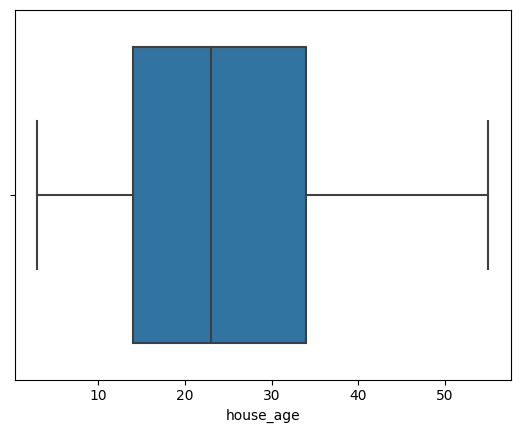

In [49]:
sns.boxplot(x='house_age',data=df)

<AxesSubplot: xlabel='SALES_PRICE'>

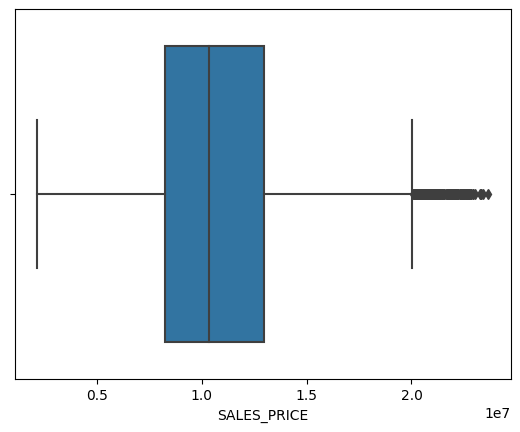

In [50]:
sns.boxplot(x='SALES_PRICE',data=df)

C:\Users\USER\AppData\Local\Temp\ipykernel_14532\1304719078.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SALES_PRICE'])


<AxesSubplot: xlabel='SALES_PRICE', ylabel='Density'>

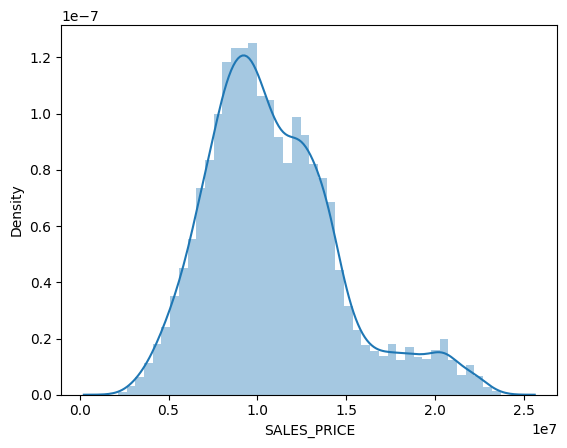

In [51]:
sns.distplot(df['SALES_PRICE'])

In [52]:
df = df.drop(columns=['QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM','QS_OVERALL', 'sold_year', 'build_year'])

In [53]:
df.shape

(7056, 14)

##  Bi-Variant analysis (Feature vs Target variable)

<AxesSubplot: xlabel='AREA', ylabel='SALES_PRICE'>

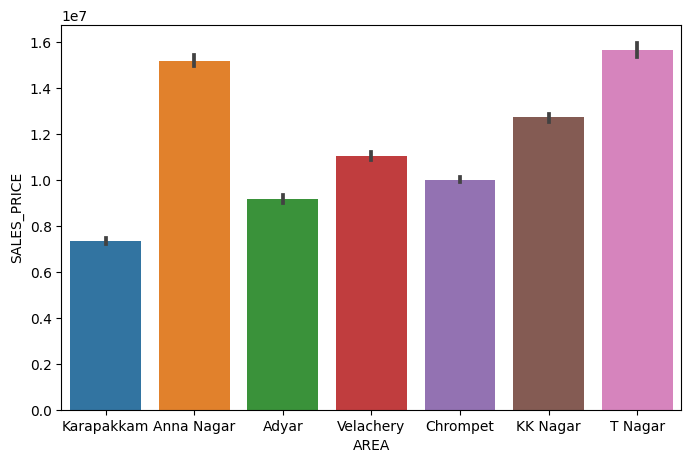

In [54]:
plt.figure(figsize=(8,5))
sns.barplot(x='AREA',y="SALES_PRICE", data=df)

<AxesSubplot: xlabel='SALE_COND', ylabel='SALES_PRICE'>

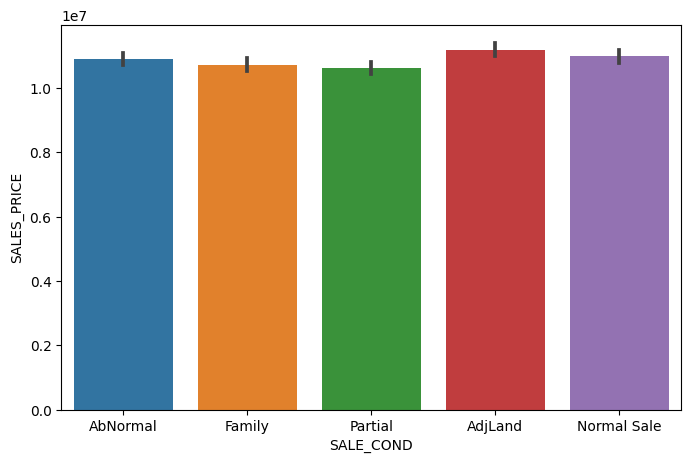

In [55]:
plt.figure(figsize=(8,5))
sns.barplot(x='SALE_COND',y="SALES_PRICE", data=df)

<AxesSubplot: xlabel='PARK_FACIL', ylabel='SALES_PRICE'>

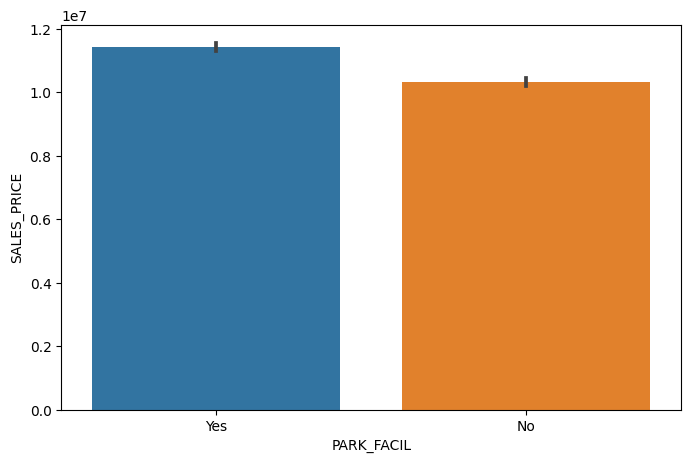

In [56]:
plt.figure(figsize=(8,5))
sns.barplot(x='PARK_FACIL',y="SALES_PRICE", data=df)

<AxesSubplot: xlabel='BUILDTYPE', ylabel='SALES_PRICE'>

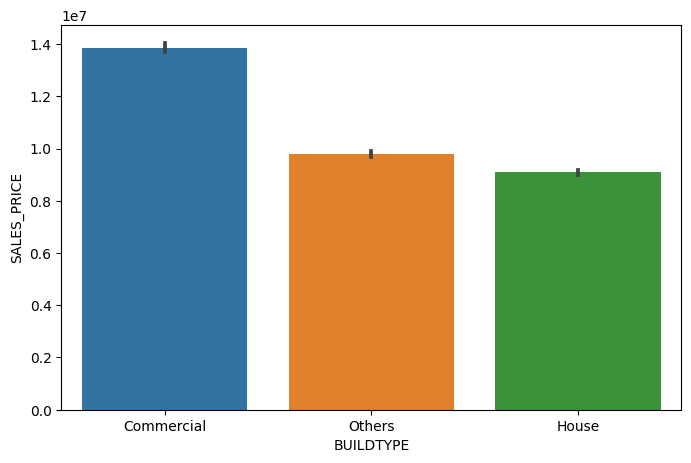

In [57]:
plt.figure(figsize=(8,5))
sns.barplot(x='BUILDTYPE',y="SALES_PRICE", data=df)

<AxesSubplot: xlabel='UTILITY_AVAIL', ylabel='SALES_PRICE'>

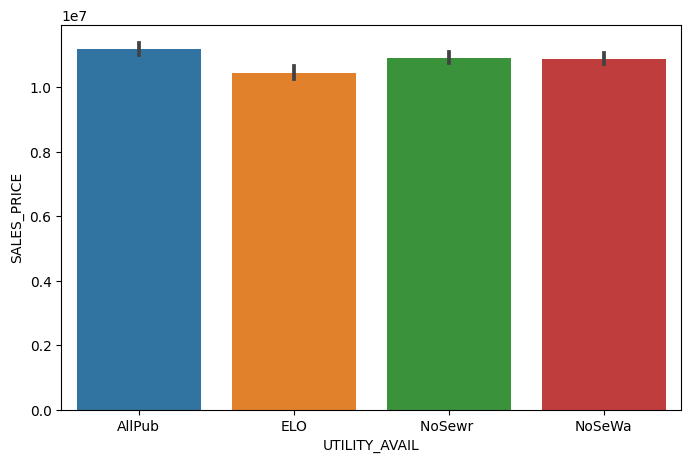

In [58]:
plt.figure(figsize=(8,5))
sns.barplot(x='UTILITY_AVAIL',y="SALES_PRICE", data=df)

<AxesSubplot: xlabel='STREET', ylabel='SALES_PRICE'>

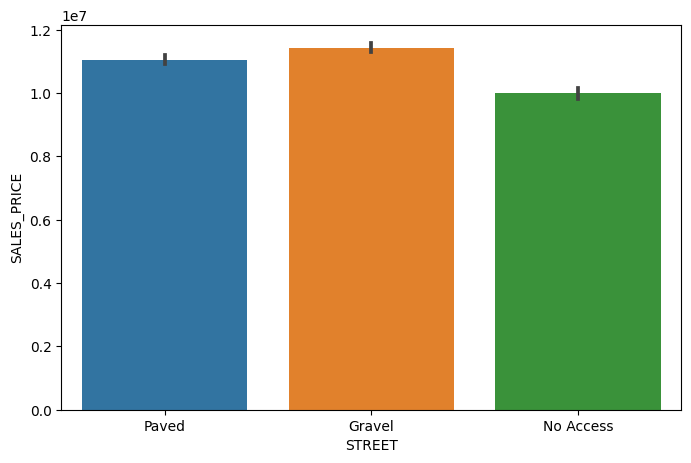

In [59]:
plt.figure(figsize=(8,5))
sns.barplot(x='STREET',y="SALES_PRICE", data=df)

<AxesSubplot: xlabel='MZZONE', ylabel='SALES_PRICE'>

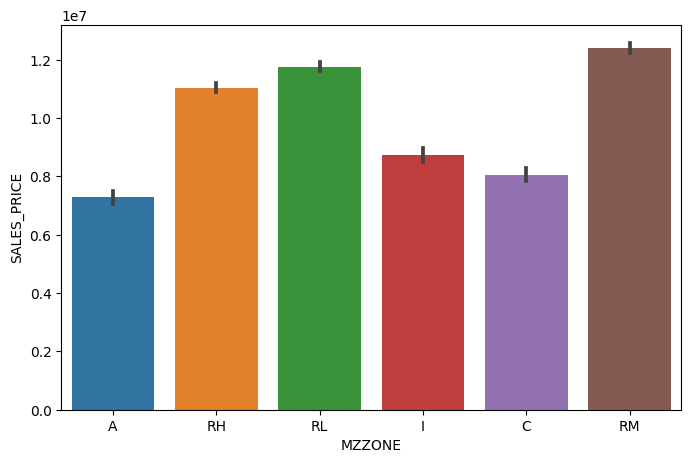

In [60]:
plt.figure(figsize=(8,5))
sns.barplot(x='MZZONE',y="SALES_PRICE", data=df)

<AxesSubplot: xlabel='N_BEDROOM', ylabel='SALES_PRICE'>

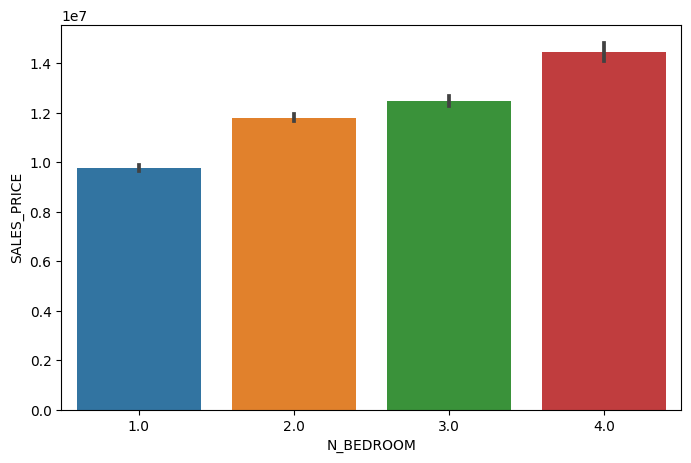

In [61]:
plt.figure(figsize=(8,5))
sns.barplot(x='N_BEDROOM',y="SALES_PRICE", data=df)

<AxesSubplot: xlabel='N_ROOM', ylabel='SALES_PRICE'>

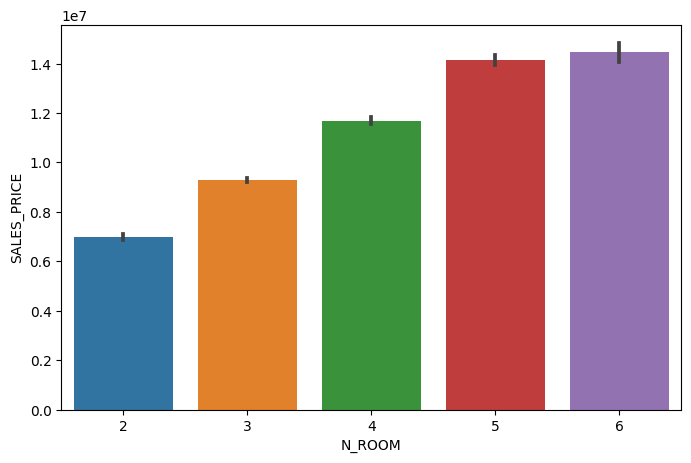

In [62]:
plt.figure(figsize=(8,5))
sns.barplot(x='N_ROOM',y="SALES_PRICE", data=df)

<AxesSubplot: xlabel='N_BATHROOM', ylabel='SALES_PRICE'>

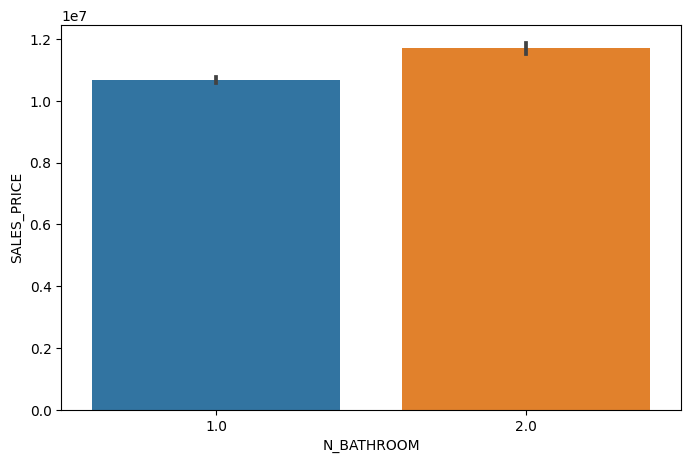

In [63]:
plt.figure(figsize=(8,5))
sns.barplot(x='N_BATHROOM',y="SALES_PRICE", data=df)

<AxesSubplot: xlabel='house_age', ylabel='SALES_PRICE'>

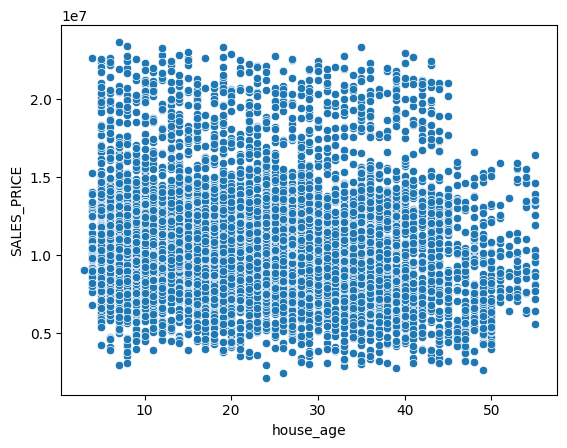

In [64]:
sns.scatterplot(x="house_age",y="SALES_PRICE",data=df)

<AxesSubplot: xlabel='INT_SQFT', ylabel='SALES_PRICE'>

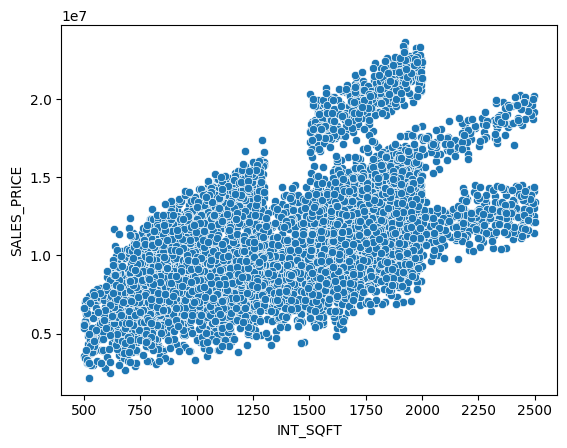

In [65]:
sns.scatterplot(x="INT_SQFT",y="SALES_PRICE",data=df)

<AxesSubplot: xlabel='DIST_MAINROAD', ylabel='SALES_PRICE'>

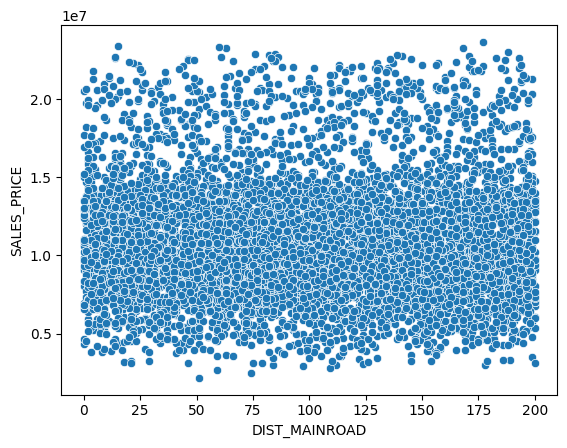

In [66]:
sns.scatterplot(x="DIST_MAINROAD",y="SALES_PRICE",data=df)

## Encoding the data - One Hot 

In [67]:
new_df = pd.get_dummies(df,columns=['AREA','SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL','STREET', 'MZZONE'])
new_df

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALES_PRICE,house_age,AREA_Adyar,AREA_Anna Nagar,AREA_Chrompet,...,UTILITY_AVAIL_NoSewr,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,131,1.0,1.0,3,7600000,44,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,1986,26,2.0,1.0,5,21717770,11,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,909,70,1.0,1.0,3,13159200,20,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1855,14,3.0,2.0,5,9630290,22,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4,1226,84,1.0,1.0,3,7406250,30,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,598,51,1.0,1.0,2,5353000,49,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7105,1897,52,3.0,2.0,5,10818480,9,0,0,0,...,0,0,1,0,0,0,0,1,0,0
7106,1614,152,2.0,1.0,4,8351410,28,0,0,0,...,0,1,0,0,0,0,1,0,0,0
7107,787,40,1.0,1.0,2,8507000,32,0,0,0,...,0,0,0,1,0,0,0,0,1,0


## Spliting the data

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [69]:
X = new_df.drop("SALES_PRICE",axis=1)
y = new_df["SALES_PRICE"]

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [71]:
m = []
n = [i for i in X.columns]
acc = []
for i in X.columns:
    a = new_df[[i]]
    b = new_df["SALES_PRICE"]
    model = LinearRegression()
    model.fit(a,b)
    m.append(np.mean(cross_val_score(model,a,b)))
    acc.append(model.score(a,b))
h = pd.DataFrame({"Features":n,"Cross_val_score":m,"Accuracy":acc})
h.sort_values("Cross_val_score",ascending=False)

,Features,Cross_val_score,Accuracy
0,INT_SQFT,0.373719,3.753621e-01
4,N_ROOM,0.362341,3.641119e-01
20,BUILDTYPE_Commercial,0.301150,3.044824e-01
10,AREA_Karapakkam,0.210512,2.114240e-01
7,AREA_Anna Nagar,0.159533,1.598423e-01
11,AREA_T Nagar,0.116912,1.189205e-01
21,BUILDTYPE_House,0.116845,1.189018e-01
2,N_BEDROOM,0.109177,1.106197e-01
30,MZZONE_A,0.073740,7.504467e-02
35,MZZONE_RM,0.054267,5.495395e-02


In [72]:
new_df.corr()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALES_PRICE,house_age,AREA_Adyar,AREA_Anna Nagar,AREA_Chrompet,...,UTILITY_AVAIL_NoSewr,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
INT_SQFT,1.000000,0.002267,0.786721,0.517103,0.951305,0.612668,-0.013608,-0.323899,0.285341,-0.464190,...,0.032454,0.045204,-0.112518,0.060519,-0.092067,-0.083041,-0.078137,0.031993,0.068570,0.052282
DIST_MAINROAD,0.002267,1.000000,-0.001938,0.002496,0.002313,0.018062,-0.003065,0.011309,0.005070,-0.014578,...,0.010719,-0.005007,-0.008877,0.013309,-0.012944,-0.008765,0.008020,0.008670,0.008504,-0.008835
N_BEDROOM,0.786721,-0.001938,1.000000,0.756016,0.840654,0.332595,-0.045636,-0.203499,-0.105725,-0.329505,...,0.039741,0.062000,-0.139021,0.068653,-0.040924,-0.016641,-0.014721,-0.012528,0.040863,0.015147
N_BATHROOM,0.517103,0.002496,0.756016,1.000000,0.570110,0.110984,-0.019123,-0.037662,-0.183090,-0.292204,...,0.030710,0.045352,-0.077789,0.027803,-0.000799,0.052288,0.059161,-0.032009,-0.012684,-0.022134
N_ROOM,0.951305,0.002313,0.840654,0.570110,1.000000,0.603417,-0.034339,-0.272016,0.244347,-0.376985,...,0.034603,0.049088,-0.104922,0.049529,-0.105156,-0.090722,-0.087739,0.025635,0.085121,0.060344
SALES_PRICE,0.612668,0.018062,0.332595,0.110984,0.603417,1.000000,-0.120418,-0.158495,0.399803,-0.131425,...,0.004384,0.108235,-0.150019,0.032941,-0.273943,-0.217955,-0.160745,0.022493,0.137747,0.234423
house_age,-0.013608,-0.003065,-0.045636,-0.019123,-0.034339,-0.120418,1.000000,-0.045453,0.027738,-0.098856,...,-0.009988,-0.024034,0.044476,-0.017784,0.067511,0.062423,0.076692,-0.028369,-0.052999,-0.043223
AREA_Adyar,-0.323899,0.011309,-0.203499,-0.037662,-0.272016,-0.158495,-0.045453,1.000000,-0.123029,-0.196349,...,-0.033814,-0.016809,0.035350,-0.016418,0.132365,0.143512,0.126502,-0.078181,-0.078098,-0.086873
AREA_Anna Nagar,0.285341,0.005070,-0.105725,-0.183090,0.244347,0.399803,0.027738,-0.123029,1.000000,-0.197493,...,-0.017136,-0.007115,0.046976,-0.036971,-0.100555,-0.101977,-0.099017,0.059014,0.060114,0.063005
AREA_Chrompet,-0.464190,-0.014578,-0.329505,-0.292204,-0.376985,-0.131425,-0.098856,-0.196349,-0.197493,1.000000,...,0.002847,-0.013613,0.051341,-0.034596,-0.160482,-0.162751,-0.158026,0.093319,0.100322,0.096999


<AxesSubplot: >

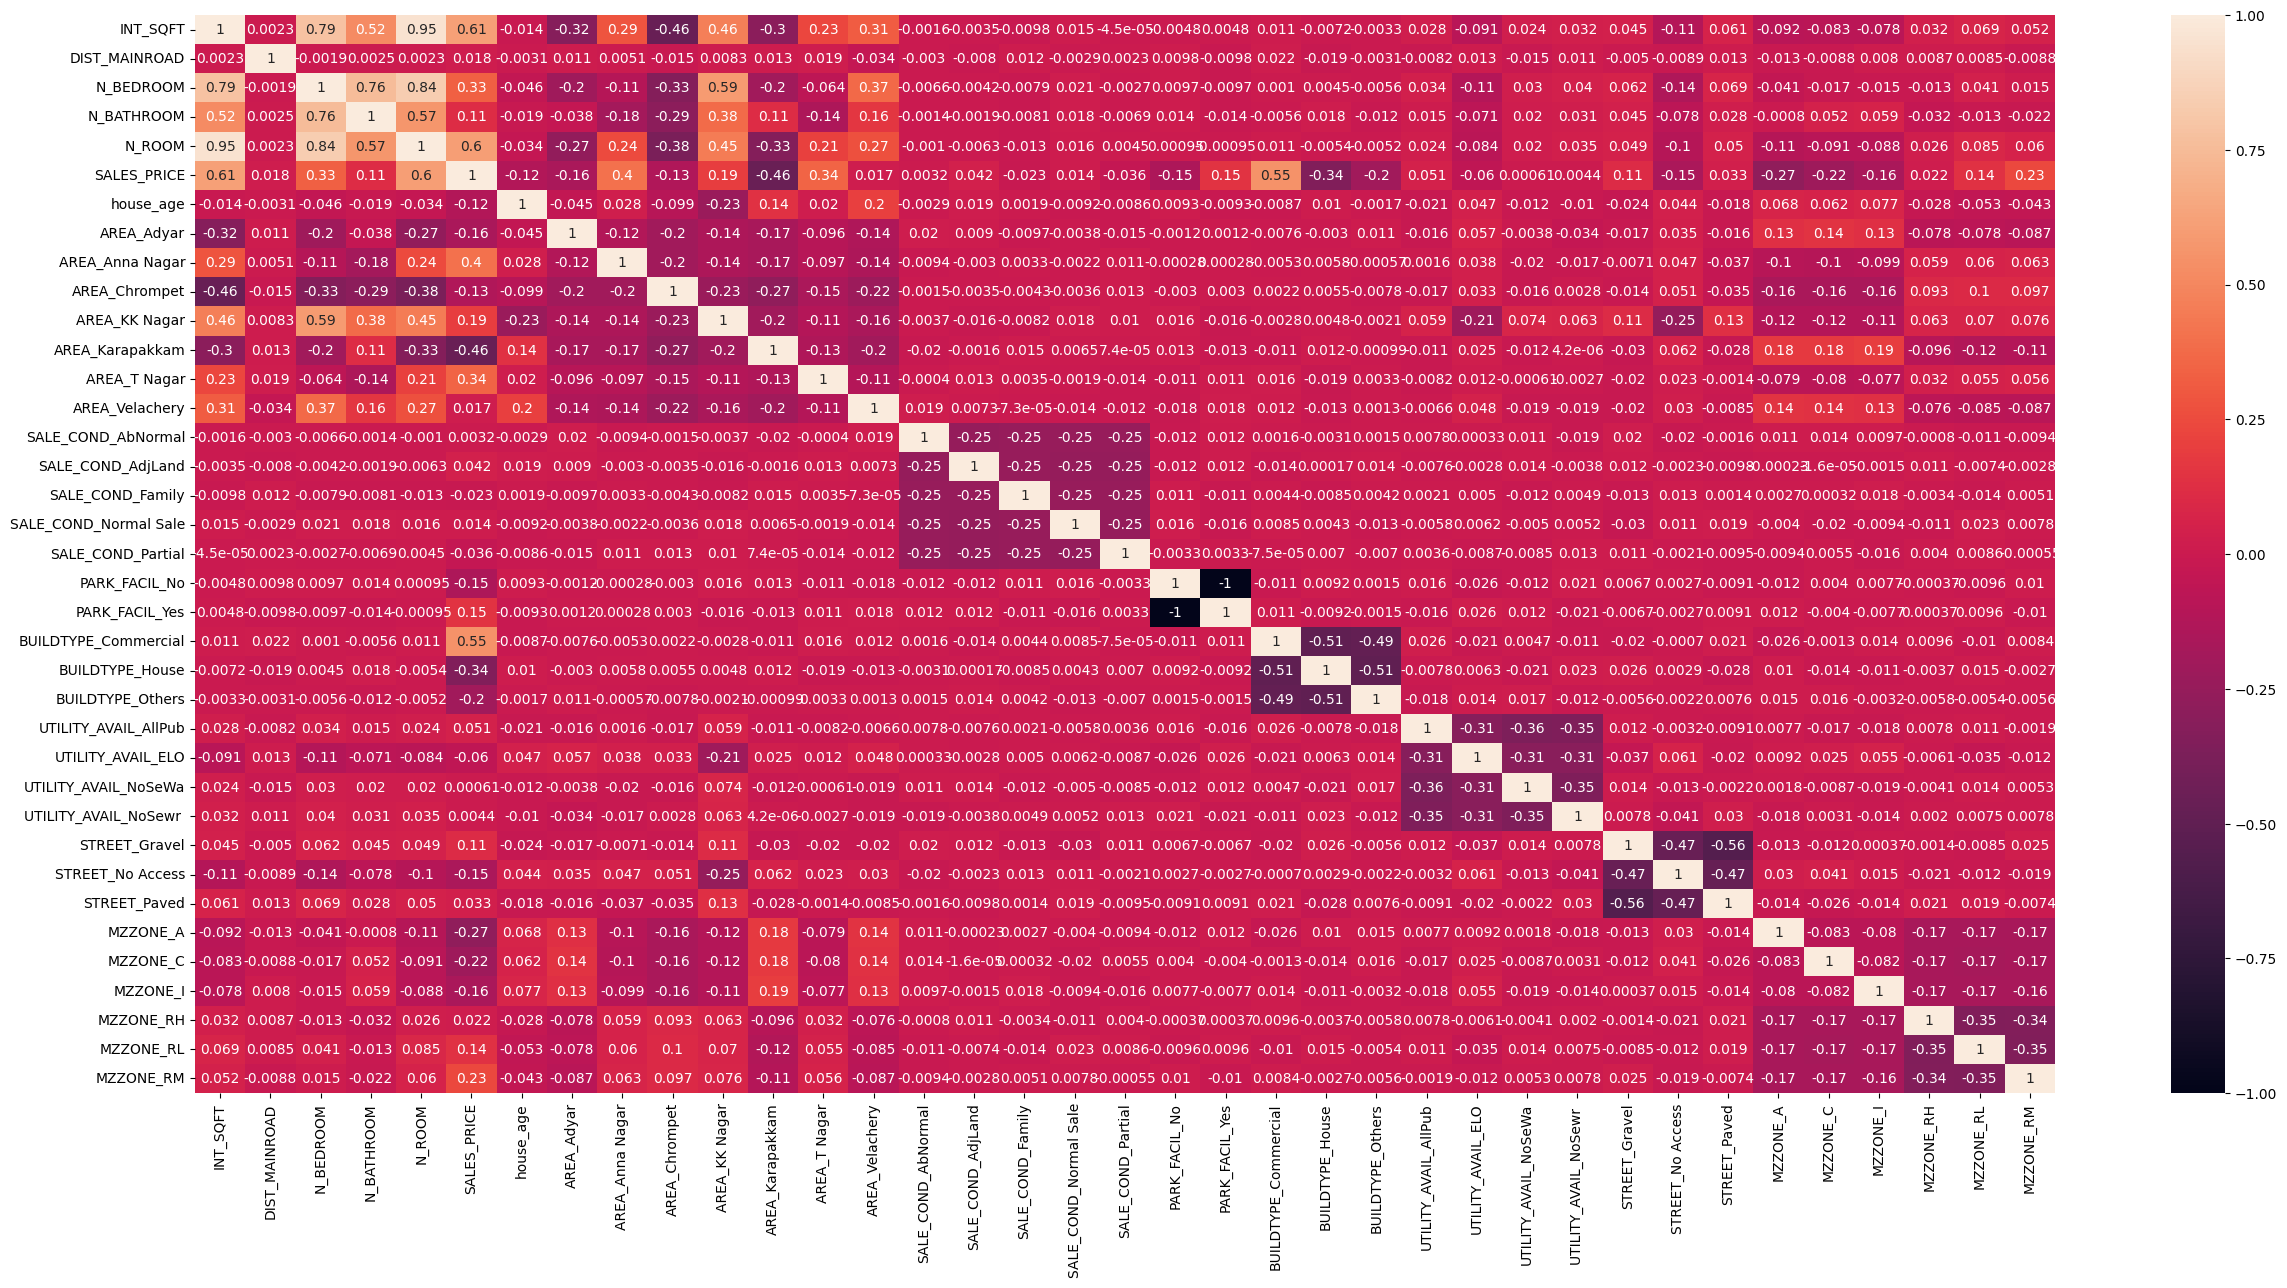

In [73]:
plt.figure(figsize=(30,14))
sns.heatmap(new_df.corr(),annot=True)

In [74]:
def trained_model(x):
    lr = x
    lr.fit(X_train,y_train)
    print(str(x)[:-2])
    print("R2 score: ",lr.score(X_test,y_test))
    print("cross_val_score: ",np.mean(cross_val_score(lr,X_train,y_train)))

In [75]:
trained_model(LinearRegression())

LinearRegression
R2 score:  0.9581209263588539
cross_val_score:  0.9573505343318235


In [76]:
trained_model(DecisionTreeRegressor())

DecisionTreeRegressor
R2 score:  0.9651372499048981
cross_val_score:  0.9624296550869283


In [77]:
trained_model(XGBRegressor())

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ..
R2 score:  0.9953798333458269
cross_val_score:  0.9946544441107215
